In [2]:
import sys
sys.path.append('..')
from configure.settings import DBSelector
from common.DataFetch import DataFetcher
import pandas as pd
import re

In [68]:
doc_name = 'bond_top_10_holding'
client = DBSelector().mongo('qq')
doc = client['db_stock'][doc_name]

In [69]:
result =[]
for item in doc.find({}):
    del item['_id']
    result.append(item)

In [70]:
df = pd.DataFrame(result)

In [71]:
df.head()

,code,name,amount,update_date,holding_ratio,crawltime
0,123102,深圳市平石资产管理有限公司-平石T5q1对冲私募证券投资基金,48.52万,2021-06-30,7.24,2021-09-05 22:36:01.154
1,123102,上海宁泉资产管理有限公司-宁泉致远56号私募证券投资基金,33.94万,2021-06-30,5.07,2021-09-05 22:36:01.154
2,123102,广州诚信创业投资有限公司,30.00万,2021-06-30,4.48,2021-09-05 22:36:01.154
3,123102,钟宝申,21.28万,2021-06-30,3.18,2021-09-05 22:36:01.154
4,123102,郑淑芬,19.72万,2021-06-30,2.94,2021-09-05 22:36:01.154


In [7]:
df['update_date'].value_counts()

2021-06-30    3541
2021-07-23      20
2021-07-07      20
2021-08-09      20
2021-08-31      20
2021-08-05      12
2021-07-08      10
2021-07-13      10
2021-08-16      10
2021-07-20      10
2021-08-19      10
2021-08-17      10
2021-08-20      10
2021-08-26      10
2021-08-10      10
2021-07-09      10
2021-07-22      10
Name: update_date, dtype: int64

In [8]:
result_item = {}
for code,sub_df in df.groupby('code'):
#     print(code)
    for date,sub_x in sub_df.groupby('update_date'):
        result_item[code+'_'+date]=sub_x['name'].tolist()

In [ ]:
result_item

In [20]:
counter ={}
for k,v in result_item.items():
    for i in v:
        counter.setdefault(i,0)
        counter[i]+=1

In [21]:
holding_list = list(sorted(counter.items(),key=lambda x:x[1],reverse=True))

In [ ]:
holding_list[:10]

In [23]:
len(result_item)

375

In [ ]:
holding_list

In [33]:
x=[i if i[1]>1 and len(i[0])<5 for i in holding_list]

SyntaxError: invalid syntax (<ipython-input-33-e50ab2eff2c1>, line 1)

In [ ]:
for i in holding_list:
    if len(i[0])<5:
        print(i)

In [ ]:
for i in holding_list:
    if len(i[0])>3:
        print(i)

In [41]:
df[df['code']=='123015']

,code,name,amount,update_date,holding_ratio,crawltime
3744,123015,贺宇,1.11万,2020-12-31,1.11,2021-08-28 23:31:11.338
3745,123015,朱桂英,8000.00,2020-12-31,0.80,2021-08-28 23:31:11.338
3746,123015,上海明汯投资管理有限公司-明汯CTA进取一号基金,7460.00,2020-12-31,0.74,2021-08-28 23:31:11.338
3747,123015,沈芸珠,6430.00,2020-12-31,0.64,2021-08-28 23:31:11.338
3748,123015,张志平,5320.00,2020-12-31,0.53,2021-08-28 23:31:11.338
3749,123015,佛山市帝海完美佳陶瓷有限公司,4930.00,2020-12-31,0.49,2021-08-28 23:31:11.338
3750,123015,刘磊,4300.00,2020-12-31,0.43,2021-08-28 23:31:11.338
3751,123015,上海甄投资产管理有限公司-甄投创鑫29号私募证券投资基金,4300.00,2020-12-31,0.43,2021-08-28 23:31:11.338
3752,123015,蔡长征,4250.00,2020-12-31,0.42,2021-08-28 23:31:11.338
3753,123015,肖志章,4000.00,2020-12-31,0.40,2021-08-28 23:31:11.338


In [72]:
data_source = DataFetcher()

In [73]:
jsl_data = data_source.jsl_bond

In [11]:
len(jsl_data)

373

In [10]:
jsl_data.head()

,可转债代码,可转债名称,可转债价格,正股名称,正股代码,正股现价,正股涨跌幅,最新转股价,溢价率,可转债涨幅,...,下修提示,下调次数,转债剩余占总市值比,剩余规模,发行规模,股东配售率,发出强赎公告,强赎日期,担保,更新日期
0,123102,华自转债,271.100,华自科技,300490,26.84,-4.04,9.25,-6.57,-4.64,...,,0,10.0,6.700,6.700,18.61,X,None,无,2021-09-09 15:03
1,127029,中钢转债,188.500,中钢国际,000928,11.35,0.35,5.89,-2.18,-0.21,...,,0,6.7,9.600,9.600,20.71,X,None,无,2021-09-09 15:03
2,127018,本钢转债,144.365,本钢板材,000761,7.35,6.37,5.02,-1.40,5.16,...,,0,23.5,60.139,68.000,24.76,X,None,本钢集团连带责任保证担保,2021-09-09 15:03
3,113612,永冠转债,184.100,永冠新材,603681,38.38,8.17,20.59,-1.23,7.17,...,,0,1.2,0.359,5.200,82.24,Y,2021-09-09,自有资产抵押担保,2021-09-09 15:03
4,113528,长城转债,211.410,长城科技,603897,49.85,-2.12,23.35,-0.97,-2.48,...,,0,6.1,5.504,6.340,53.90,N,None,无担保,2021-09-09 15:03


In [74]:
code_name_mapper ={}
for index,row in jsl_data.iterrows():
    code_name_mapper[row['可转债代码']]=row['可转债名称']    

In [75]:
df['zz_name']=df['code'].map(lambda x:code_name_mapper.get(x))

In [14]:
df.head()

,code,name,amount,update_date,holding_ratio,crawltime,zz_name
0,123102,深圳市平石资产管理有限公司-平石T5q1对冲私募证券投资基金,48.52万,2021-06-30,7.24,2021-09-05 22:36:01.154,华自转债
1,123102,上海宁泉资产管理有限公司-宁泉致远56号私募证券投资基金,33.94万,2021-06-30,5.07,2021-09-05 22:36:01.154,华自转债
2,123102,广州诚信创业投资有限公司,30.00万,2021-06-30,4.48,2021-09-05 22:36:01.154,华自转债
3,123102,钟宝申,21.28万,2021-06-30,3.18,2021-09-05 22:36:01.154,华自转债
4,123102,郑淑芬,19.72万,2021-06-30,2.94,2021-09-05 22:36:01.154,华自转债


In [24]:
monster_bond = jsl_data[(jsl_data['可转债价格']>150) & (jsl_data['溢价率']>50)]['可转债代码'].tolist()

In [ ]:
# del df['crawltime']

for code in monster_bond:
    print('='*20)
    print(df[df['code']==code])

In [30]:
monster_bond_df = df[df['code'].isin(monster_bond)]

In [31]:
monster_bond_df

,code,name,amount,update_date,holding_ratio,zz_name
3254,123034,陈东辉,1.75万,2021-06-30,2.24,通光转债
3255,123034,金玉娟,1.60万,2021-06-30,2.05,通光转债
3256,123034,嵇方一,1.35万,2021-06-30,1.74,通光转债
3257,123034,卫青,1.20万,2021-06-30,1.54,通光转债
3258,123034,严奔,7420.00,2021-06-30,0.95,通光转债
...,...,...,...,...,...,...
3749,123015,佛山市帝海完美佳陶瓷有限公司,4930.00,2020-12-31,0.49,蓝盾转债
3750,123015,刘磊,4300.00,2020-12-31,0.43,蓝盾转债
3751,123015,上海甄投资产管理有限公司-甄投创鑫29号私募证券投资基金,4300.00,2020-12-31,0.43,蓝盾转债
3752,123015,蔡长征,4250.00,2020-12-31,0.42,蓝盾转债


In [32]:
def name_mapper_func(x):
    pass

In [36]:
count_df = monster_bond_df['name'].value_counts()

In [ ]:
for index in count_df.index:
    print(index,count_df[index])
    # print(index,count_df.index[index])

In [16]:

def map_short_name(x):
    if len(x)<5:
        return x
    for i in mapper_list:
        if re.search(i,x):
            return i
    return ''

In [12]:
len(set(df[df['name'].str.contains('林园')]['code'].tolist()))

24

In [ ]:
mapper_list =['林园','宁泉','甄投','明汯','汇添富','博时',
'易方达','全国社保','兴全','东方红','南方东英','嘉实','富国','天弘',
'光大保德','诺安','中欧','中邮','上海迎水','广发','鹏华','上海泉汐','上海睿郡']
df['short_name']=df['name'].map(map_short_name)
# print(df[['zz_name','short_name','name']])
display_institute((df))

In [13]:
def display_institute(df):
    for index,row in df.iterrows():
        if row['short_name']=='':
            print(row['name'])

In [31]:
def get_invest_company(x):
    return x.split('-')[0]

In [32]:
df['invest_company']=df['name'].map(get_invest_company)

In [80]:
institute_counter ={}
for index,row in df[df['name'].str.contains('私募')].iterrows():
    # print(row['name'],row['holding_ratio'],row['zz_name'],row['invest_company'])
    institute_counter.setdefault(get_invest_company(row['name']),0)
    institute_counter[get_invest_company(row['name'])]+=1


In [ ]:
for i in df['invest_company'].value_counts().index:
    print(i)

In [83]:
institution = list(sorted(institute_counter.items(),key=lambda x:x[1],reverse=True))

In [89]:
X1=[]
X2=[]
for x1,x2 in institution:
    X1.append(x1)
    X2.append(x2)
    # print(x1)
    # print(x1,x2)
institution_df  = pd.DataFrame({'name':X1,'count':X2})

In [90]:
institution_df.to_excel('institution.xlsx',encoding='utf8')

In [58]:
df1 = pd.DataFrame(result)

In [59]:
df1.to_excel('kzz_top_holding.xlsx',encoding='utf8')

In [64]:
len(df[df['name'].str.contains('林园')][['zz_name','name','holding_ratio']])

60

In [ ]:
df[df['name'].str.contains('林园')][['zz_name','name','holding_ratio']].groupby('zz_name').sum('holding_ratio').sort_values('holding_ratio',ascending=False)

In [117]:
def convertor(x):
    if re.search('万',x):
        x=x.replace('万','')
        x=float(x)*10**4
    elif re.search('亿',x):
        x=x.replace('亿','')
        x=float(x)*10**9
    
    return float(x)

df['amount_float']=df['amount'].map(convertor)

In [ ]:
df[df['name'].str.contains('睿郡')][['zz_name','name','amount_float']].groupby('zz_name').sum('amount_float').sort_values('amount_float',ascending=False)

In [ ]:
df[df['name'].str.contains('宁泉')][['zz_name','name','holding_ratio']].groupby('zz_name').sum('holding_ratio').sort_values('holding_ratio',ascending=False)

In [ ]:
relationsihp ={}
for index,row in df.iterrows():
    
    relationsihp.setdefault()

In [26]:
# 分类

In [27]:
def category(x):
    # category_list = ['私募','']
    if re.search('私募',x):
        return '私募'

    if len(x)<5:
        return '个人'

    if re.search('社保',x):
        return '社保'

    return '公募'

In [28]:
df['category']=df['name'].map(category)

In [29]:
df.head()

,code,name,amount,update_date,holding_ratio,crawltime,zz_name,category
0,123102,深圳市平石资产管理有限公司-平石T5q1对冲私募证券投资基金,48.52万,2021-06-30,7.24,2021-09-05 22:36:01.154,华自转债,私募
1,123102,上海宁泉资产管理有限公司-宁泉致远56号私募证券投资基金,33.94万,2021-06-30,5.07,2021-09-05 22:36:01.154,华自转债,私募
2,123102,广州诚信创业投资有限公司,30.00万,2021-06-30,4.48,2021-09-05 22:36:01.154,华自转债,公募
3,123102,钟宝申,21.28万,2021-06-30,3.18,2021-09-05 22:36:01.154,华自转债,个人
4,123102,郑淑芬,19.72万,2021-06-30,2.94,2021-09-05 22:36:01.154,华自转债,个人


In [30]:
df['category'].value_counts()

公募    2618
个人     717
私募     320
社保      88
Name: category, dtype: int64

In [34]:
result_dict = {}
for code,code_df in df.groupby('code'):
    result_dict[code]=code_df['invest_company'].tolist()

In [35]:
invest_name_code_dict = {}
for k,v in result_dict.items():
    for i in v:
        invest_name_code_dict.setdefault(i,[])
        invest_name_code_dict[i].append(k)

In [48]:

relationship_dict ={}
for k,v in invest_name_code_dict.items():
    relationship_dict.setdefault(k,{})
    # for i in v:
    for other_k,other_v in invest_name_code_dict.items():
        if k==other_k:
            continue
        relationship_dict[k].update({other_k:set(v)&set(other_v)})



In [49]:
relation_len = {}
for k,v in relationship_dict.items():
    max_value = 0
    max_value_name = ''

    for name,value in v.items():
        if len(value)>max_value:
            max_value =len(value)
            max_value_name = name

    relation_len[k]=(max_value_name,max_value)

In [ ]:
f=open('relation.txt','w',encoding='utf8')
for k,v in relation_len.items():
    if v[1]>2:
        print(k,v)
        f.write(f'{k}\t{v}\n')

In [44]:
df.head()

,code,name,amount,update_date,holding_ratio,crawltime,zz_name,category,invest_company
0,123102,深圳市平石资产管理有限公司-平石T5q1对冲私募证券投资基金,48.52万,2021-06-30,7.24,2021-09-05 22:36:01.154,华自转债,私募,深圳市平石资产管理有限公司
1,123102,上海宁泉资产管理有限公司-宁泉致远56号私募证券投资基金,33.94万,2021-06-30,5.07,2021-09-05 22:36:01.154,华自转债,私募,上海宁泉资产管理有限公司
2,123102,广州诚信创业投资有限公司,30.00万,2021-06-30,4.48,2021-09-05 22:36:01.154,华自转债,公募,广州诚信创业投资有限公司
3,123102,钟宝申,21.28万,2021-06-30,3.18,2021-09-05 22:36:01.154,华自转债,个人,钟宝申
4,123102,郑淑芬,19.72万,2021-06-30,2.94,2021-09-05 22:36:01.154,华自转债,个人,郑淑芬


In [46]:
df[df['name'].str.contains('希瓦')]

,code,name,amount,update_date,holding_ratio,crawltime,zz_name,category,invest_company
444,110070,海南希瓦私募基金管理有限责任公司-希瓦散夜股债平衡1号私募证券投资基金,5.00万,2021-06-30,2.3,2021-09-05 22:37:45.440,凌钢转债,私募,海南希瓦私募基金管理有限责任公司


In [ ]:
# 绘制关系图

In [18]:
import random
from collections import Counter
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

In [15]:
def show_figure(relationDict,namelist,title):
    edgewidth = []

    for i in relationDict.values():
        edgewidth.append(i/5)

    plt.figure(figsize=(16,9))
    g = nx.MultiGraph()
    g.add_edges_from(relationDict.keys())
    d = dict(g.degree)

    nx.draw_circular(g,nodelist=d.keys(),
                     node_size=[v*600 for v in d.values()],
                     node_color=range(len(namelist)),
                     cmap=plt.cm.Paired,
                     with_labels=True,
                     edge_color=range(len(relationDict)),
                     edge_cmap=plt.cm.Dark2,
                     alpha=1.0, width=edgewidth)

    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.text(-1.05, 1.05, title, fontsize=12)  # -1，1字体位置
    plt.savefig('tet.png')
    plt.show()

In [19]:
mask=df['name'].str.len()<5
df_=df.loc[mask]
namelist=[]
combinations_name=[]
relation_dict={}
for index,row in df_.groupby('code'):
    names = row['name'].tolist()
    namelist+=names
    combinations_name += combinations(sorted(set(names)),2)
relation_dict = Counter(combinations_name)
print(relation_dict)

Counter({('丁碧霞', '李怡名'): 17, ('李志鹤', '李怡名'): 5, ('丁碧霞', '李志鹤'): 4, ('梁小红', '郑志坤'): 3, ('梁小红', '翟建琴'): 3, ('丁碧霞', '张鹏'): 3, ('张鹏', '李怡名'): 3, ('蔡子跃', '蔡晓东'): 3, ('曹卫宏', '裘成'): 3, ('丁碧霞', '张群英'): 2, ('张群英', '李怡名'): 2, ('林巧珠', '郑志坤'): 2, ('章才凤', '章瑞新'): 2, ('王筱慧', '郑志坤'): 2, ('梁小红', '郑淑芬'): 2, ('郑淑芬', '郑芹珠'): 2, ('冯玲', '王胜民'): 2, ('王胜民', '连志明'): 2, ('王红喜', '王胜民'): 2, ('汤波', '高楠'): 2, ('丁碧霞', '裘成'): 2, ('李志鹤', '裘成'): 2, ('李怡名', '裘成'): 2, ('吴菊香', '蔡子跃'): 2, ('吴菊香', '蔡晓东'): 2, ('丁碧霞', '阮美娟'): 2, ('张鹏', '阮美娟'): 2, ('李怡名', '阮美娟'): 2, ('郑淑芬', '钟宝申'): 2, ('张小乐', '裘成'): 2, ('李怡名', '胡幼治'): 2, ('梁小红', '王筱慧'): 2, ('周耀光', '康义辉'): 1, ('周耀光', '张咏梅'): 1, ('周耀光', '徐广明'): 1, ('周耀光', '杨永宁'): 1, ('周耀光', '毕金祥'): 1, ('周耀光', '程燕辉'): 1, ('周耀光', '胡可'): 1, ('周耀光', '葛明'): 1, ('周耀光', '邢振华'): 1, ('康义辉', '张咏梅'): 1, ('康义辉', '徐广明'): 1, ('康义辉', '杨永宁'): 1, ('康义辉', '毕金祥'): 1, ('康义辉', '程燕辉'): 1, ('康义辉', '胡可'): 1, ('康义辉', '葛明'): 1, ('康义辉', '邢振华'): 1, ('张咏梅', '徐广明'): 1, ('张咏梅', '杨永宁'): 1, ('张咏梅', '毕金祥'): 1, ('张咏梅', '程燕辉'): 1

In [15]:
df.head()

,code,name,amount,update_date,holding_ratio,crawltime,zz_name
0,123102,深圳市平石资产管理有限公司-平石T5q1对冲私募证券投资基金,48.52万,2021-06-30,7.24,2021-09-05 22:36:01.154,华自转债
1,123102,上海宁泉资产管理有限公司-宁泉致远56号私募证券投资基金,33.94万,2021-06-30,5.07,2021-09-05 22:36:01.154,华自转债
2,123102,广州诚信创业投资有限公司,30.00万,2021-06-30,4.48,2021-09-05 22:36:01.154,华自转债
3,123102,钟宝申,21.28万,2021-06-30,3.18,2021-09-05 22:36:01.154,华自转债
4,123102,郑淑芬,19.72万,2021-06-30,2.94,2021-09-05 22:36:01.154,华自转债


In [16]:
mask=df['name'].str.len()<5
df_individual = df.loc[mask]

In [ ]:
namelist=[]
combinations_name=[]
relation_dict={}
for index,row in df_individual.groupby('code'):
    names = row['name'].tolist()
    namelist+=names
    combinations_name += combinations(sorted(set(names)),2)
relation_dict = Counter(combinations_name)
print(relation_dict)

In [55]:
def show_figure(relationDict,namelist_,title):
    edgewidth = []

    for i in relationDict.values():
        edgewidth.append(i)

    plt.figure(figsize=(16,9))
    g = nx.MultiGraph()
    g.add_edges_from(relationDict.keys())
    d = dict(g.degree)

    nx.draw_circular(g,nodelist=d.keys(),
                     node_size=[v*700 for v in d.values()],
                     node_color=range(len(namelist_)),
                     cmap=plt.cm.Paired,
                     with_labels=True,
                     edge_color=range(len(relationDict)),
                     edge_cmap=plt.cm.Dark2,
                     alpha=1.0, width=edgewidth)

    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.text(-1.05, 1.05, title, fontsize=12)  # -1，1字体位置
    plt.savefig('tet.png')
    plt.show()

In [25]:
len(namelist)

717

In [24]:
len(relation_dict)

1632

In [60]:
remain_dict ={}
for k,v in relation_dict.items():
    if v>2:
        remain_dict[k]=v

In [61]:
name_list__ = []
for k,v in remain_dict.items():
    name_list__.append(k[0])
    name_list__.append(k[1])

In [32]:
name_list__ = []
for k,v in relation_dict.items():
    name_list__.append(k[0])
    name_list__.append(k[1])

In [62]:
name_list = list(set(name_list__))

In [39]:
len(name_list)

29

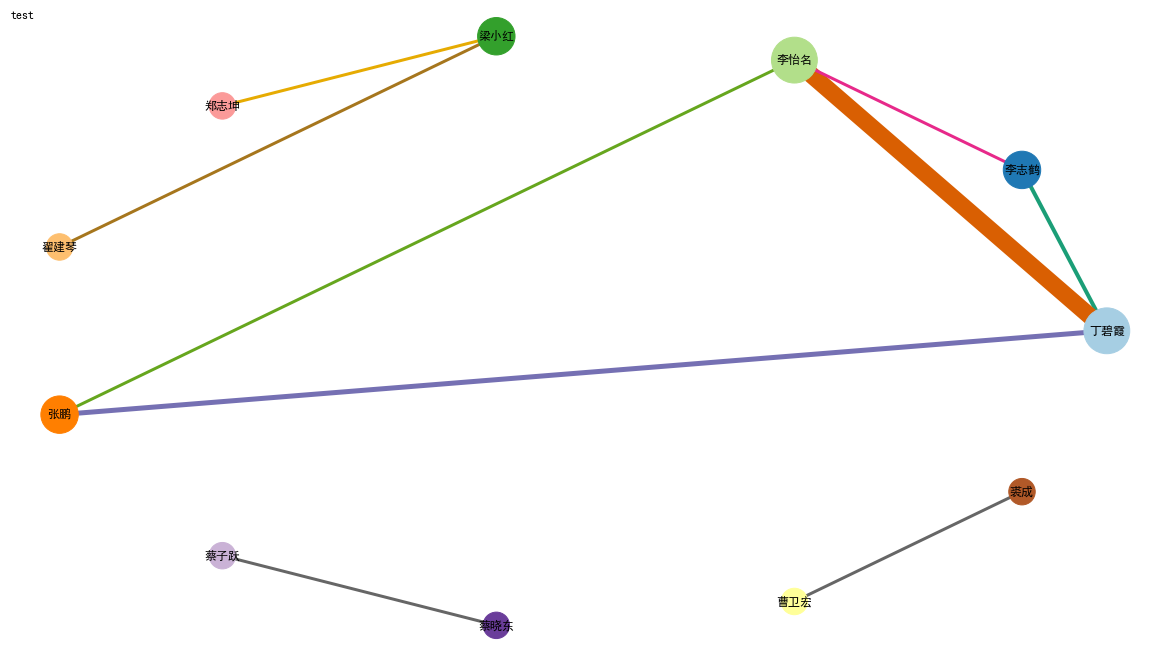

In [63]:
namelist_ = list(set(namelist)) 
show_figure(remain_dict,name_list,'test')

In [58]:
kv_result=[]
id=0
for k,v in remain_dict.items():
    d={}
    d['Source']=k[0]
    d['Target']=k[1]
    d['Weight']=v
    kv_result.append(d)
    id+=1
df = pd.DataFrame(kv_result)
df.to_csv('mycsv4.csv',encoding='gbk',index_label=None,index=None)

In [64]:
remain_dict

{('丁碧霞', '李志鹤'): 4,
 ('丁碧霞', '李怡名'): 17,
 ('李志鹤', '李怡名'): 5,
 ('梁小红', '郑志坤'): 3,
 ('梁小红', '翟建琴'): 3,
 ('丁碧霞', '张鹏'): 3,
 ('张鹏', '李怡名'): 3,
 ('蔡子跃', '蔡晓东'): 3,
 ('曹卫宏', '裘成'): 3}

In [65]:
df.head()

,Source,Target,Weight
0,丁碧霞,李志鹤,4
1,丁碧霞,李怡名,17
2,李志鹤,李怡名,5
3,梁小红,郑志坤,3
4,梁小红,翟建琴,3


In [76]:
mask_df = df[df['name'].str.len()<5]

In [77]:
mask_df.head()

,code,name,amount,update_date,holding_ratio,crawltime,zz_name
3,123102,钟宝申,21.28万,2021-06-30,3.18,2021-09-05 22:36:01.154,华自转债
4,123102,郑淑芬,19.72万,2021-06-30,2.94,2021-09-05 22:36:01.154,华自转债
53,127029,郑淑芬,21.89万,2021-06-30,2.28,2021-09-05 22:36:15.597,中钢转债
73,113612,吕新民,18.62万,2021-06-30,3.58,2021-09-05 22:36:19.893,None
81,128085,王筱慧,11.80万,2021-06-30,1.52,2021-09-05 22:36:22.023,鸿达转债


In [81]:
individual = mask_df['name'].value_counts()
for i in individual.index:
    print(f'{i:3}{individual.loc[i]:4}')

李怡名  25
丁碧霞  22
梁小红  11
郑淑芬   9
高建华   6
翟建琴   6
李志鹤   6
郑志坤   6
陈晓红   6
裘成    5
钟宝申   5
曹卫宏   4
冯玲    4
王胜民   4
吴菊香   4
蔡新宗   3
洪元盛   3
高骏    3
钟原    3
李秀娟   3
张涛    3
蔡晓东   3
郑步翠   3
张鹏    3
王筱慧   3
黄巍然   3
蔡子跃   3
王群    3
阮美娟   2
朱军    2
杜文锐   2
王红喜   2
王峰    2
章才凤   2
张虹    2
肖志章   2
陈圣干   2
刘金茂   2
林巧珠   2
曾毅    2
成康    2
方微    2
汤波    2
殷惠娥   2
蔡彬    2
连志明   2
张小乐   2
张金山   2
郑萍    2
黄永山   2
徐淑珍   2
张咏梅   2
郑芹珠   2
胡幼治   2
祁峰    2
龙梅荣   2
莫浩礼   2
高楠    2
杨永李   2
张群英   2
章瑞新   2
栾国明   2
杨哲    2
#洪健山   2
张学政   1
邓小琴   1
徐光华   1
柯金龙   1
杨梦婷   1
张祖蕾   1
刘效敏   1
齐君华   1
黄德群   1
杨林龙   1
盛况    1
吴丰礼   1
张友胜   1
祝健锋   1
金玉娟   1
白勇波   1
冯丽芳   1
李剑    1
陶静威   1
阮克荣   1
宋安慰   1
陈丹明   1
易德富   1
张锡亮   1
李慧英   1
宋爱国   1
邱钧    1
周炜    1
王益平   1
刘百宽   1
姚成志   1
项光隆   1
华丹宏   1
翁江宏   1
解岩    1
陆海泉   1
陈琪    1
闯小明   1
杨铁柱   1
梁智斌   1
陈东辉   1
郭志彦   1
李剑刚   1
方惠兰   1
蓝洋    1
沈芸珠   1
袁焕玲   1
徐利达   1
解新忠   1
吴水燕   1
蔡建雄   1
林培春   1
李胜德   1
王天贺   1
郑建勋   1
吴源    1
吴春勇   1
邢振华   1
黄敏春   1
方福英   1
毛志勇   1

In [87]:
individual[individual>2].plot()

AttributeError: 'Series' object has no attribute 'bar'

In [88]:
import joblib
joblib.dump(individual,'individual.jb')

['individual.jb']

In [111]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

# 翻转Y轴

data=individual[individual>2]
data=data.sort_values(ascending=False)
X=data.index.tolist()
Y=data.values.tolist()
print(X)
print(Y)

c = (
    Bar()
    .add_xaxis(X)
    .add_yaxis(
        "个人持有转债数目>=3", 
    Y,
    # linestyle_opts=opts.LineStyleOpts(width=1,color='rgb(255, 0, 0)')
    )
    # .reversal_axis()
    # .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="个人持有转债数目"),
    xaxis_opts=opts.AxisOpts(
                                name='名称',
                                min_interval=1,
                                splitline_opts=opts.SplitLineOpts(is_show=True),
                                axislabel_opts=opts.LabelOpts(rotate=45),

                                ),
                                yaxis_opts=opts.AxisOpts(
                                name='个数',
                                # min_interval=5,
                                splitline_opts=opts.SplitLineOpts(is_show=True)
                                ),).set_colors(['green'])
    
).render('bar_demo.html')

['李怡名', '丁碧霞', '梁小红', '郑淑芬', '高建华', '翟建琴', '李志鹤', '郑志坤', '陈晓红', '裘成', '钟宝申', '冯玲', '曹卫宏', '王胜民', '吴菊香', '蔡子跃', '蔡新宗', '洪元盛', '高骏', '钟原', '李秀娟', '张涛', '蔡晓东', '郑步翠', '张鹏', '王筱慧', '黄巍然', '王群']
[25, 22, 11, 9, 6, 6, 6, 6, 6, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [113]:
df[df['name'].str.contains('明汯')]

,code,name,amount,update_date,holding_ratio,crawltime,zz_name
102,113016,上海明汯投资管理有限公司-明汯春晓十期私募证券投资基金,5.44万,2021-06-30,2.27,2021-09-05 22:36:26.365,小康转债
103,113016,上海明汯投资管理有限公司-明汯春晓十一期私募证券投资基金,5.44万,2021-06-30,2.27,2021-09-05 22:36:26.365,小康转债
237,113039,上海明汯投资管理有限公司-明汯春晓十期私募证券投资基金,6.50万,2021-06-30,1.20,2021-09-05 22:36:55.701,嘉泽转债
238,113039,上海明汯投资管理有限公司-明汯春晓十一期私募证券投资基金,6.50万,2021-06-30,1.20,2021-09-05 22:36:55.701,嘉泽转债
632,123012,上海明汯投资管理有限公司-明汯春晓十一期私募证券投资基金,3.30万,2021-06-30,2.56,2021-09-05 22:38:29.793,万顺转债
633,123012,上海明汯投资管理有限公司-明汯春晓十期私募证券投资基金,3.30万,2021-06-30,2.56,2021-09-05 22:38:29.793,万顺转债
637,123012,上海明汯投资管理有限公司-明汯春晓300增强专项1号私募证券投资基金,1.93万,2021-06-30,1.50,2021-09-05 22:38:29.793,万顺转债
639,123012,上海明汯投资管理有限公司-明汯春晓九期私募证券投资基金,1.89万,2021-06-30,1.47,2021-09-05 22:38:29.793,万顺转债
746,123061,上海明汯投资管理有限公司-明汯春晓十一期私募证券投资基金,3.90万,2021-06-30,1.56,2021-09-05 22:38:54.698,航新转债
747,123061,上海明汯投资管理有限公司-明汯春晓十期私募证券投资基金,3.89万,2021-06-30,1.56,2021-09-05 22:38:54.698,航新转债


In [114]:
df.to_excel('十大持有人2021-09-05.xlsx',encoding='utf8')

In [115]:
df.head()

,code,name,amount,update_date,holding_ratio,crawltime,zz_name
0,123102,深圳市平石资产管理有限公司-平石T5q1对冲私募证券投资基金,48.52万,2021-06-30,7.24,2021-09-05 22:36:01.154,华自转债
1,123102,上海宁泉资产管理有限公司-宁泉致远56号私募证券投资基金,33.94万,2021-06-30,5.07,2021-09-05 22:36:01.154,华自转债
2,123102,广州诚信创业投资有限公司,30.00万,2021-06-30,4.48,2021-09-05 22:36:01.154,华自转债
3,123102,钟宝申,21.28万,2021-06-30,3.18,2021-09-05 22:36:01.154,华自转债
4,123102,郑淑芬,19.72万,2021-06-30,2.94,2021-09-05 22:36:01.154,华自转债


In [121]:
df[df['name']=='丁碧霞']['amount_float'].sum()

4306100.0

In [120]:
df[df['name']=='李怡名']['amount']

190     37.44万
213     21.15万
262     16.55万
330     18.63万
395      7.26万
580     28.18万
860     19.01万
911      7.70万
932     11.00万
1078     6.39万
1171    38.14万
1512    25.36万
1550     9.87万
1668    32.75万
1681     9.28万
1709    12.54万
1899     7.67万
1912     3.59万
2065    12.65万
2111    35.76万
2141    46.70万
2402    28.51万
2485     7.93万
3003    67.97万
3508     8.38万
Name: amount, dtype: object

In [136]:
for code,row_df in df.groupby('code'):
    if len(row_df[row_df['name'].isin(['李怡名'])])>0 and len(row_df[row_df['name'].isin(['丁碧霞'])])>0:
        print(row_df['zz_name'].iloc[0])


华钰转债
奇精转债
三星转债
新星转债
岱勒转债
今天转债
思特转债
银信转债
斯莱转债
金诺转债
明电转债
威唐转债
金陵转债
海印转债
迪龙转债
江银转债
华锋转债


In [137]:
count

17